<a href="https://colab.research.google.com/github/Andrey22154/coffee/blob/main/%D0%97%D0%B0%D0%BA%D0%B0%D0%B7%D1%8B_%D0%BA%D0%BE%D1%84%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = pd.read_excel('/content/Заказы кофе.xlsx')

In [ ]:
data.head()

,Дата и время,Капучино,Латте,Американо,Эспрессо,Нет заказов
0,2023-01-09 09:00:00,2,1,1,1,3
1,2023-01-09 10:00:00,0,1,1,1,2
2,2023-01-09 11:00:00,1,2,0,2,1
3,2023-01-09 12:00:00,1,1,1,1,1
4,2023-01-09 13:00:00,0,2,1,2,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Дата и время  84 non-null     datetime64[ns]
 1   Капучино      84 non-null     int64         
 2   Латте         84 non-null     int64         
 3   Американо     84 non-null     int64         
 4   Эспрессо      84 non-null     int64         
 5   Нет заказов   84 non-null     int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 4.1 KB


In [ ]:
'''Подготова данных к анализу'''

data['Количество клиентов'] = data['Капучино'] + data['Латте'] + data['Американо'] + data['Эспрессо'] + data['Нет заказов']
data['Дата'] = data['Дата и время'].dt.date
data['Время'] = data['Дата и время'].dt.time
data = data.drop(['Дата и время'], axis = 1)
data['Количество заказов кофе'] = data['Количество клиентов'] - data['Нет заказов']

In [ ]:
data.head()

,Капучино,Латте,Американо,Эспрессо,Нет заказов,Количество клиентов,Дата,Время,Количество заказов кофе
0,2,1,1,1,3,8,2023-01-09,09:00:00,5
1,0,1,1,1,2,5,2023-01-09,10:00:00,3
2,1,2,0,2,1,6,2023-01-09,11:00:00,5
3,1,1,1,1,1,5,2023-01-09,12:00:00,4
4,0,2,1,2,1,6,2023-01-09,13:00:00,5


In [ ]:
name_cols = ['Капучино', 'Латте',	'Американо', 'Эспрессо', 'Нет заказов',	'Количество клиентов']

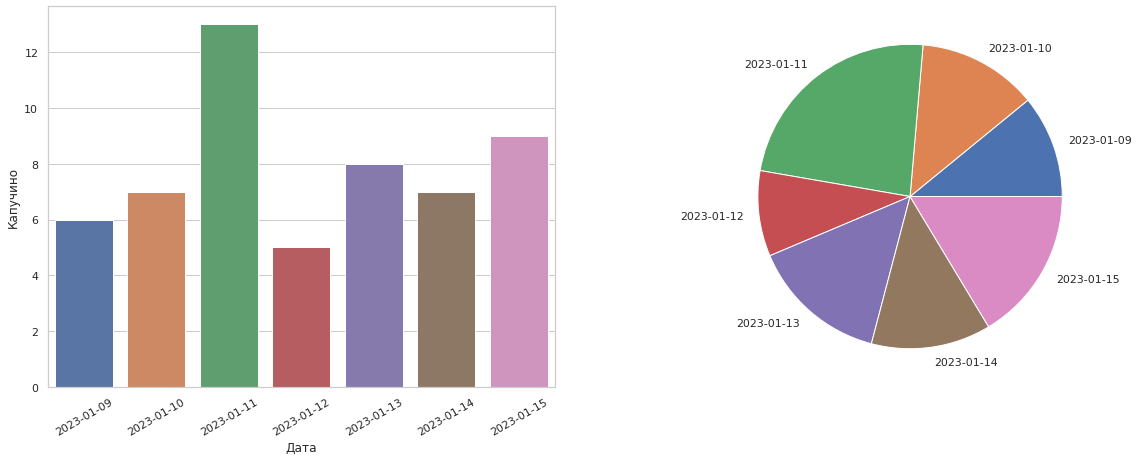

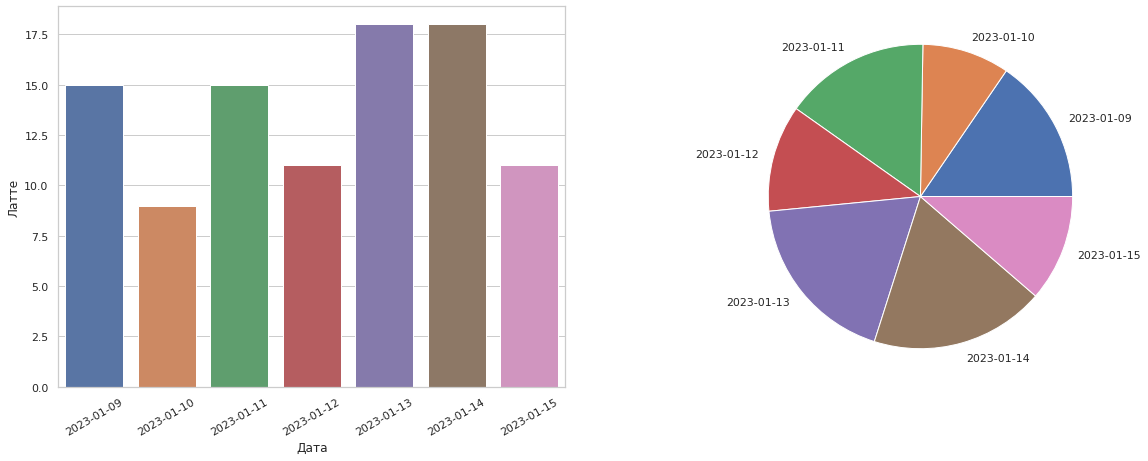

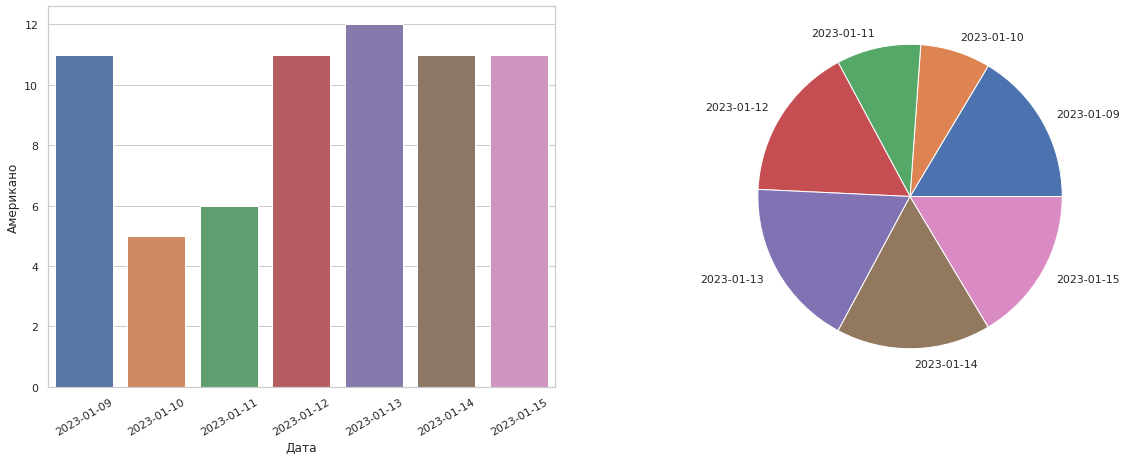

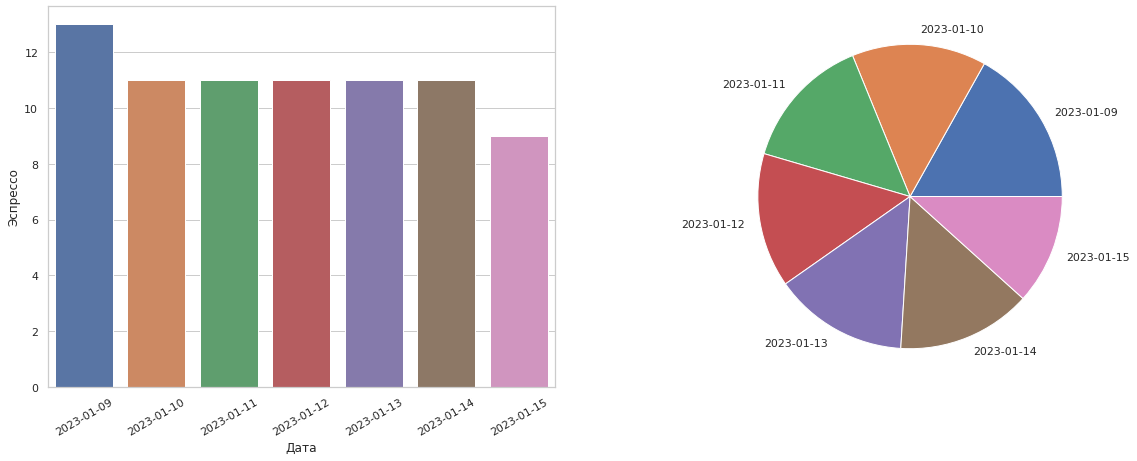

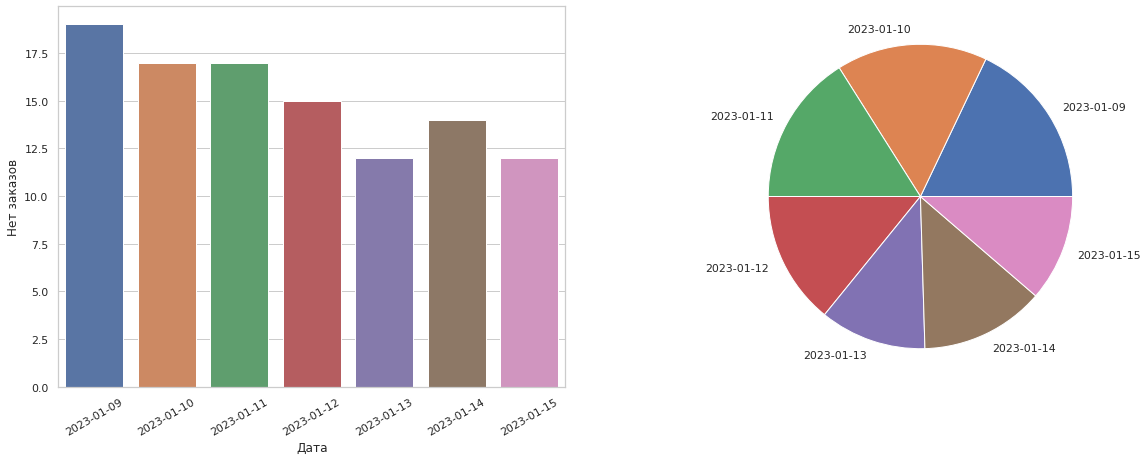

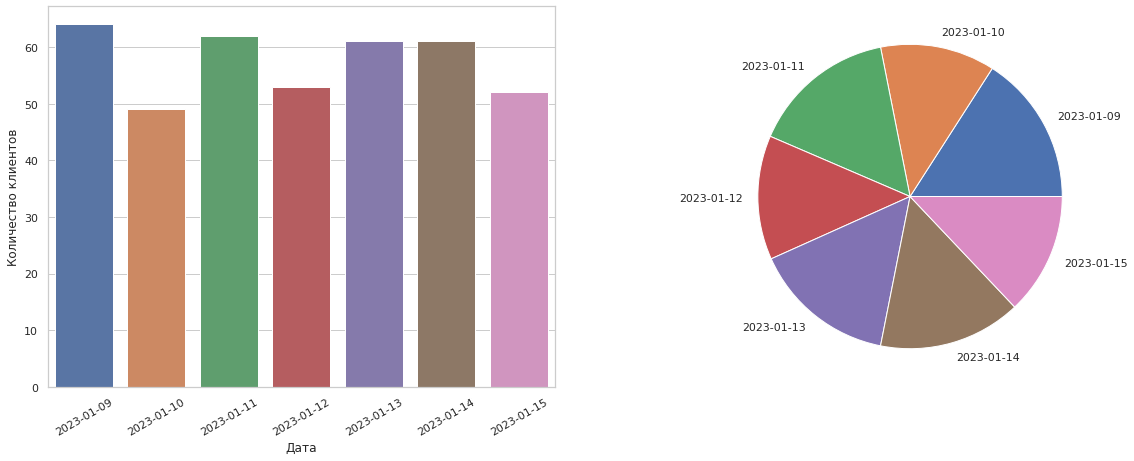

In [ ]:
'''Группируем дату и данные о заказах'''

for cols in name_cols:

  group_count = data.groupby('Дата').agg({cols:'sum'})
# baplot
  fig, axes = plt.subplots(1, 2, figsize = (20, 7))
  n = sns.barplot(data = group_count, y = group_count[cols], x = group_count.index, ax = axes[0])
  n.set_xticklabels(n.get_xticklabels(),rotation = 30)
#pie
  axes[1].pie(group_count[cols], labels = group_count.index)

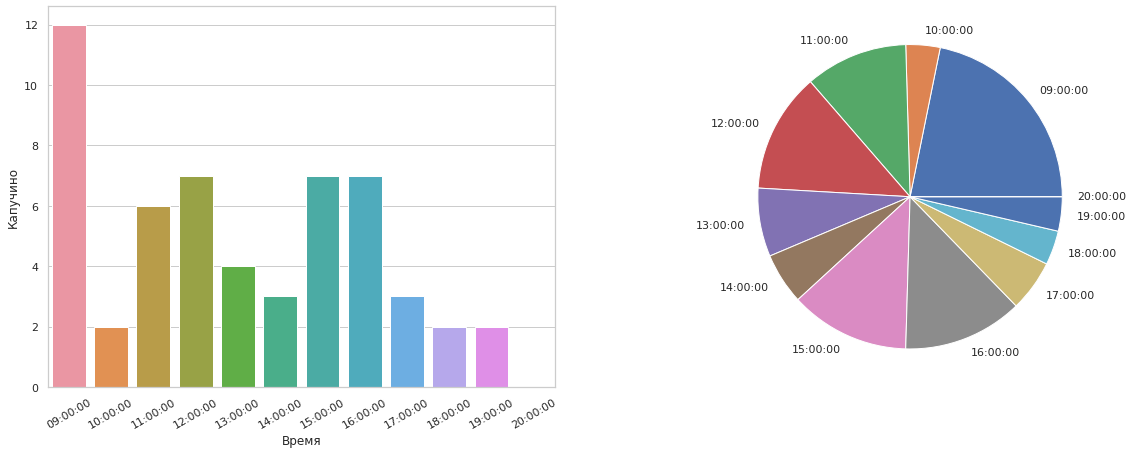

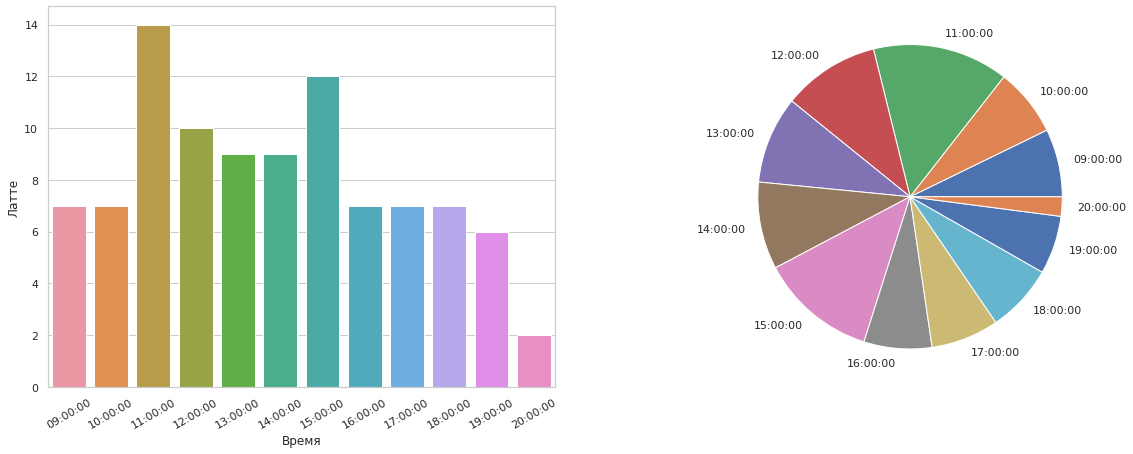

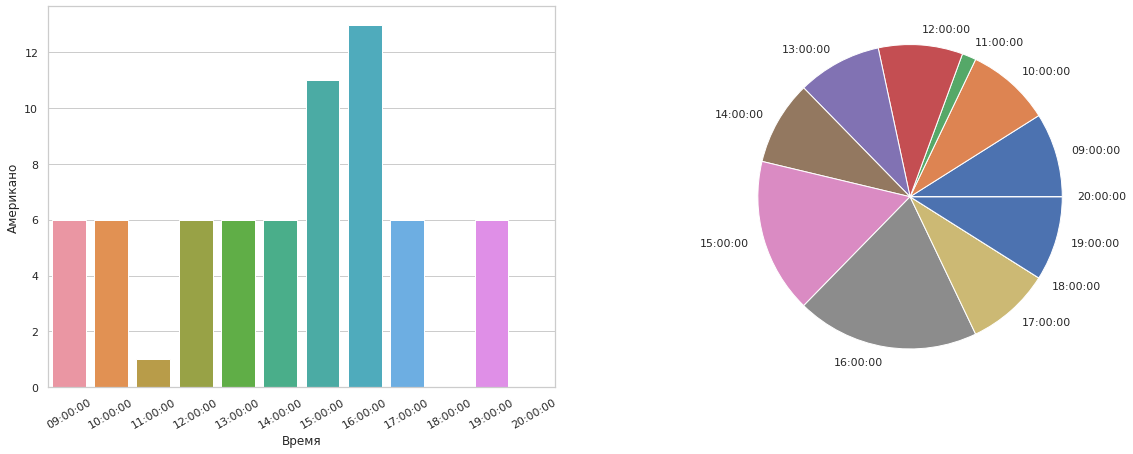

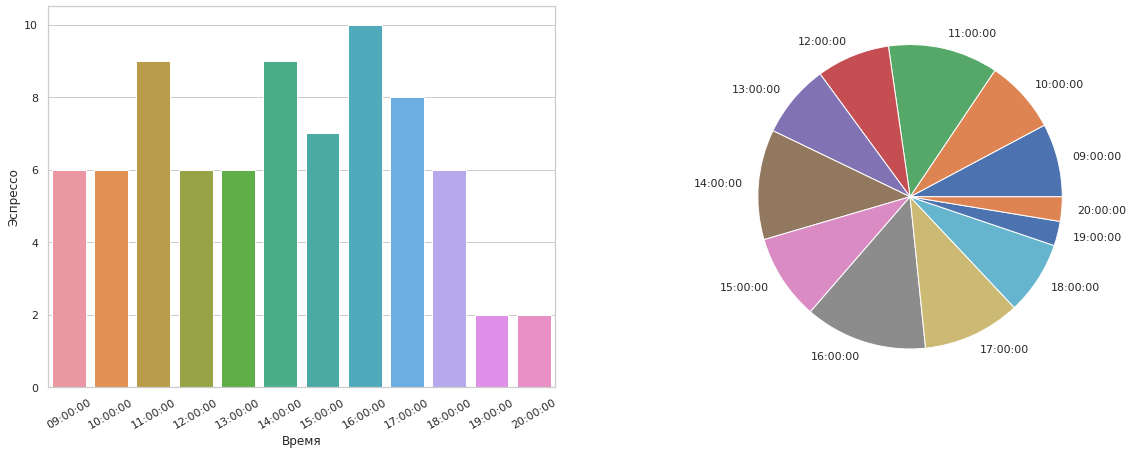

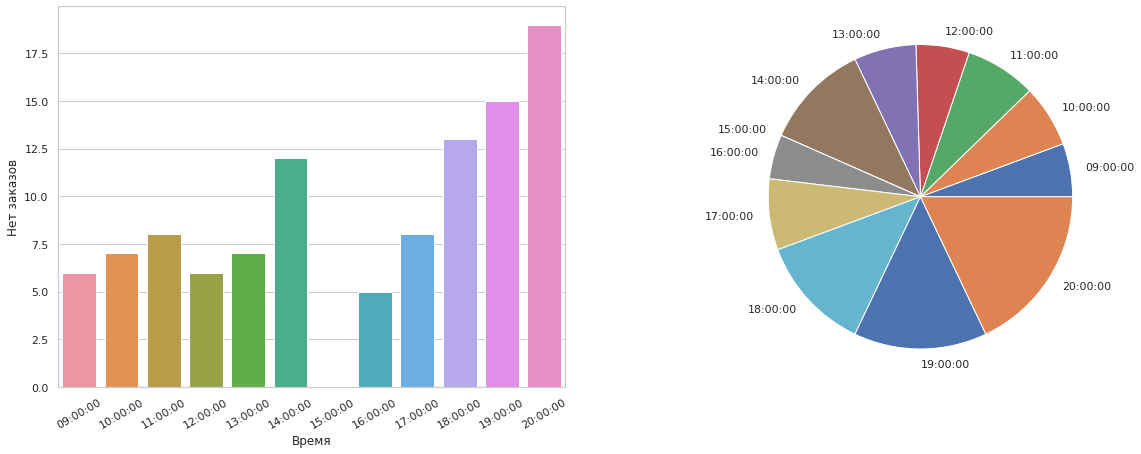

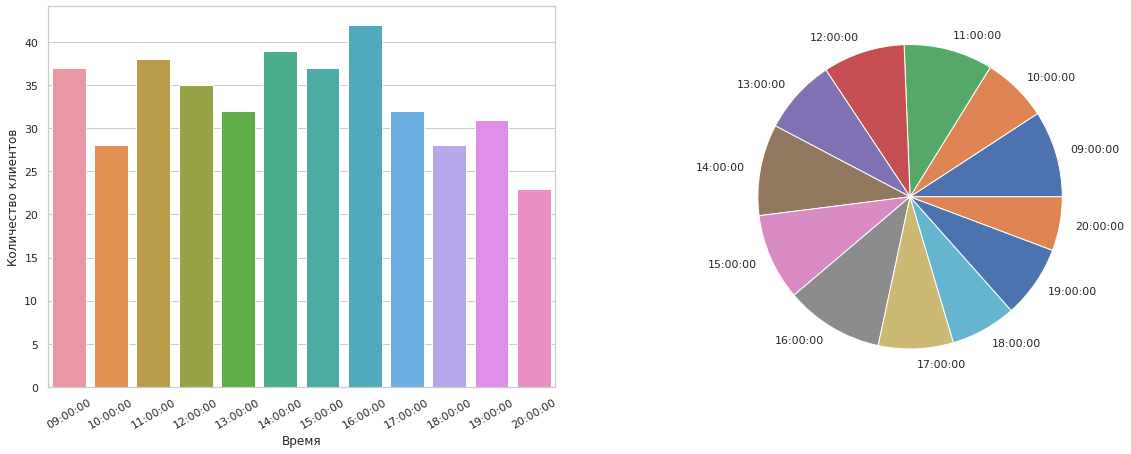

In [ ]:
'''Группируем время и данные о заказах'''

for cols in name_cols:

  group_count = data.groupby('Время').agg({cols:'sum'})

# barpot
  fig, axes = plt.subplots(1, 2, figsize = (20, 7))
  n = sns.barplot(data = group_count, y = group_count[cols], x = group_count.index, ax = axes[0])
  n.set_xticklabels(n.get_xticklabels(),rotation = 30)
# pie
  axes[1].pie(group_count[cols], labels = group_count.index)

In [ ]:
all_coffe = pd.DataFrame(data[['Капучино', 'Латте', 'Американо', 'Эспрессо', 'Нет заказов']].sum())

Text(0, 0.5, 'Количество')

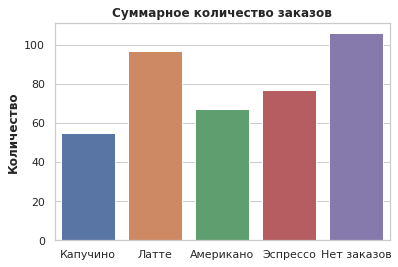

In [ ]:
'''Сравнение суммарных заказов за неделю'''

sns.barplot(data = all_coffe, x = all_coffe.index, y = all_coffe[0])
plt.title('Суммарное количество заказов', fontweight='bold')
plt.ylabel('Количество', fontweight='bold')

In [ ]:
for_pie = [all_coffe[0].sum(), data['Нет заказов'].sum()] # первый элемент - наличие заказа, второй - отсутствие
labels = ['Наличие заказа', 'Отсутствие заказа']

Text(0.5, 1.0, 'Сранение количества заказов/их отсутствия')

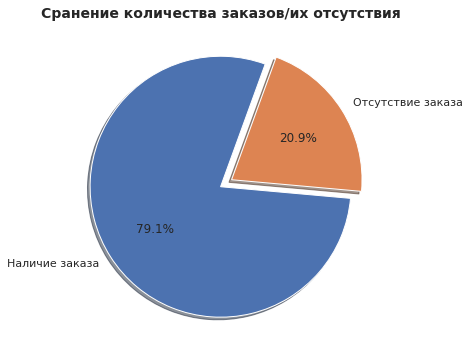

In [ ]:
'''Сранение количества заказов/их отсутствия'''

explode = (0, 0.10)
plt.figure(figsize = (6, 6))
plt.pie(for_pie, explode = explode, labels = labels, autopct='%1.1f%%',
        shadow=True, startangle=70)
plt.title("Сранение количества заказов/их отсутствия", fontsize = 14, fontweight='bold')

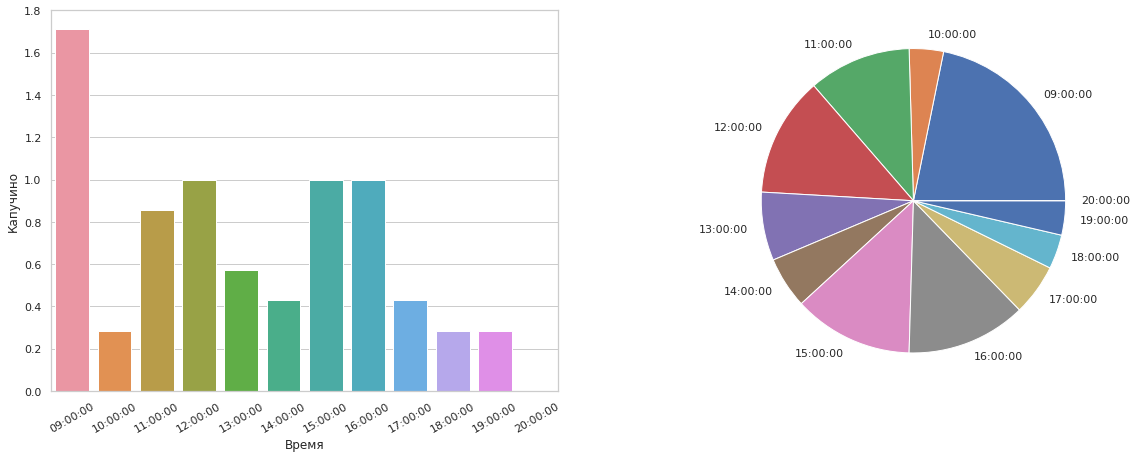

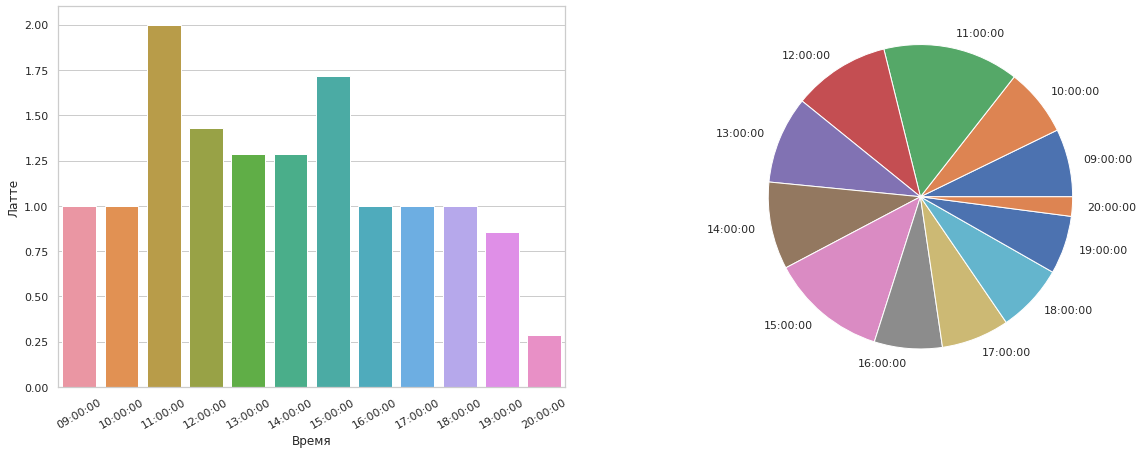

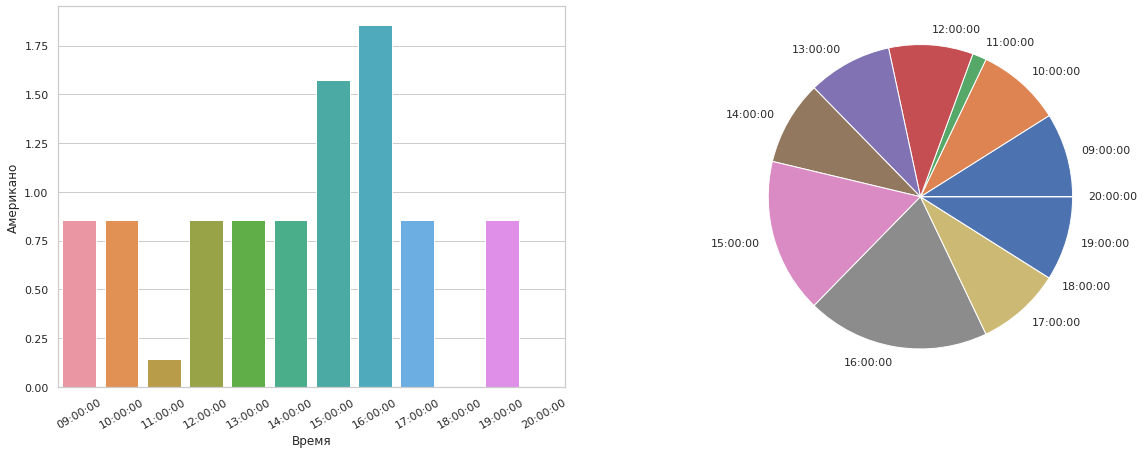

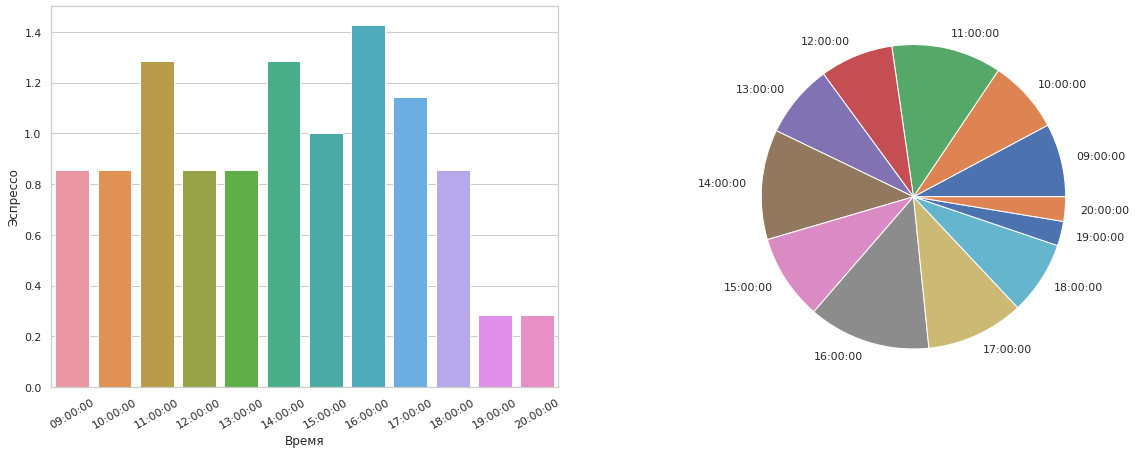

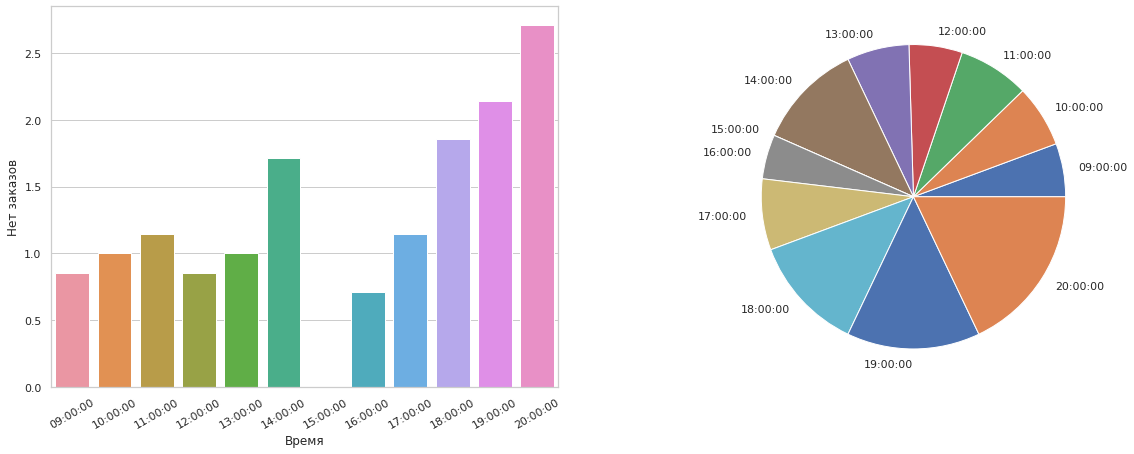

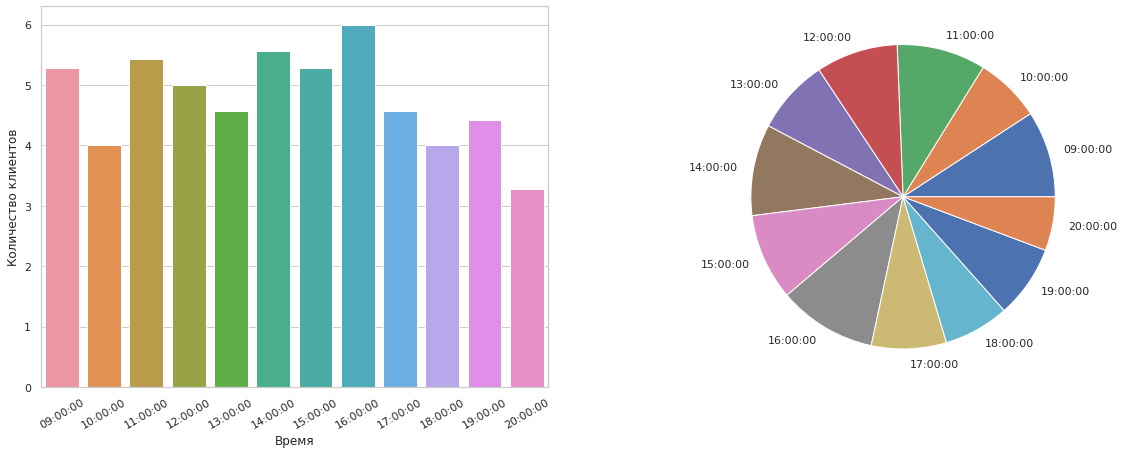

In [ ]:
for cols in name_cols:

  group_count = data.groupby('Время').agg({cols:'mean'})

# barpot
  fig, axes = plt.subplots(1, 2, figsize = (20, 7))
  n = sns.barplot(data = group_count, y = group_count[cols], x = group_count.index, ax = axes[0])
  n.set_xticklabels(n.get_xticklabels(),rotation = 30)
# pie
  axes[1].pie(group_count[cols], labels = group_count.index)

In [ ]:
group_count = data.groupby('Время').agg({'Количество клиентов':'sum'})
no_coffee = data.groupby('Время').agg({'Нет заказов':'sum'})
group_count['Нет заказов'] = no_coffee['Нет заказов']

#sns.barplot(data = data, y = group_count[cols], x = group_count.index, ax = axes[0])

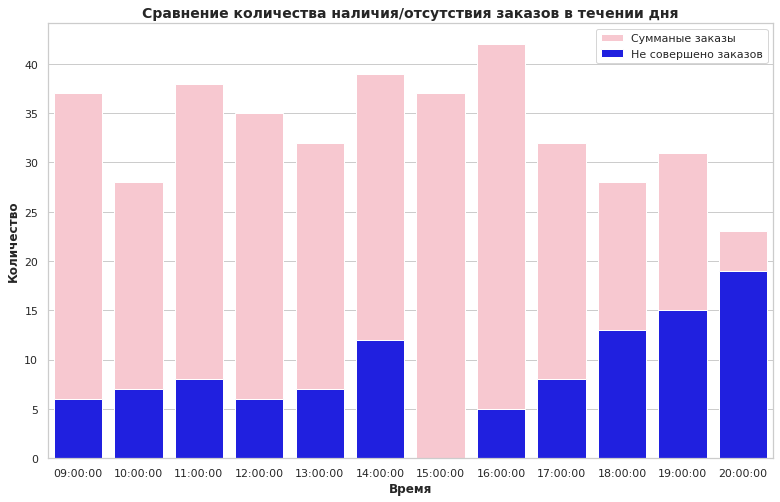

In [ ]:
plt.figure(figsize = (13, 8))
sns.barplot(data = group_count, y = group_count['Количество клиентов'], 
            x = group_count.index, color = 'pink', label = 'Сумманые заказы')
sns.barplot(data = group_count, y = group_count['Нет заказов'], 
            x = group_count.index, color = 'blue', label = 'Не совершено заказов')
plt.title('Сравнение количества наличия/отсутствия заказов в течении дня', fontsize = 14, fontweight='bold')
plt.ylabel('Количество', fontweight='bold')
plt.xlabel('Время', fontweight='bold')
plt.legend()